In [45]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime as dt
from datetime import timedelta
import os
import json
import csv
from time import sleep

In [2]:
now_bangkok = (dt.now() + timedelta(hours=7)).isoformat()[:19]
ytd_bangkok = (dt.now() + timedelta(hours=7, days=-30)).isoformat()[:19]

now_YYYY = now_bangkok[:4]
now_mm   = now_bangkok[5:7]
now_dd   = now_bangkok[8:10]

ytd_YYYY = ytd_bangkok[:4]
ytd_mm   = ytd_bangkok[5:7]
ytd_dd   = ytd_bangkok[8:10]

In [5]:
stock = 'ADVANC'
url   = f'https://www.infoquest.co.th/?s={stock}'

<!DOCTYPE html>

<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-KL9J8RN');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<meta content="noindex, follow" name="robots">
<meta content="4.7.70" name="dlm-version"/>
<!-- This site is optimized with the Yoast SEO plugin v19.13 - https://yoast.com/wordpress/plugins/seo/ -->
<title>You searched for ADVANC : สำนักข่าวอินโฟเควสท์</title>
<meta content="en_US" property="og:locale">
<meta content="article" property="og:type">
<meta content="You search
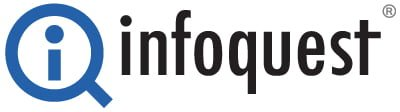

In [6]:
session = requests.Session()
res = session.get(url)
res_text = res.text
soup = BeautifulSoup(res_text)
soup

In [41]:
original_reqs = [
    {
        "title": a.select('.entry-title')[0].select('a')[0].string, 
        "href": a.select('.entry-title')[0].select('a')[0].get('href'),
        "text": a.select('.entry-summary')[0].string or a.select('.entry-summary')[0].text,
        "time": [{
            "class":    b.get('class'),
            "datetime": b.get('datetime'),
            "text":     b.text,
        } for b in a.select('time')],
    }
    for a in soup.select('.content-item')
    if len(a.select('.entry-summary')[0].text) > 1
]
print(len(original_reqs))
original_reqs

20


[{'title': 'ADVANC กัดฟันคงเป้าปี 68 ดันรายได้-EBITDA โต 3-5% ฝ่าความท้าทายเศรษฐกิจรับพิษ “ทรัมป์”',
  'href': 'https://www.infoquest.co.th/2025/494938',
  'text': '\n            นางสาวสมฤทัย ตัณฑกิตติ หัวหน้าแผนกงานนักลงทุนสัมพันธ์ บมจ.แอดวานซ์ อินโฟร์ เซอร์วิส [ADVANC] กล่าวว่า แนวโน้มไตรมาส 2/68 และไตรมาสที่เหลือของปี ต้องติดตามภาพรวมเศรษฐกิจจากที่ได้รับผลกระทบมาตรการภาษีตอ…\n            \nข่าวหุ้น\n14 พ.ค. 68 16:33น.2025-05-14 \n',
  'time': [{'class': ['entry-date', 'published'],
    'datetime': '14 พ.ค. 68 16:33น.',
    'text': '14 พ.ค. 68 16:33น.'},
   {'class': ['updated'],
    'datetime': '2025-05-14T16:41:33+07:00',
    'text': '2025-05-14'}]},
 {'title': 'ADVANC บวก 2.69% เทรดคึกคัก กำไร Q1/68 สวยกว่าคาด เก็งตลาดขยับเป้าทั้งปีขึ้นลุ้นทะลุ 4 หมื่นลบ.',
  'href': 'https://www.infoquest.co.th/2025/492712',
  'text': '\n        ADVANC ปรับขึ้น 2.69% มาที่ 305 บาท เพิ่มขึ้น 8.00 บาท มูลค่าซื้อขาย 1,036.93 ล้านบาท เมื่อเวลา 10.24 น. จากราคาเปิด 305.00 บาท ราคาสูงสุด 306 บาท ราคาต่

In [42]:
daily_dir_path_1 = f'../data/1_raw_response/02_infoquest/{now_YYYY}-{now_mm}-{now_dd}'
daily_dir_path_2 = f'../data/2_clean_response/02_infoquest/{now_YYYY}-{now_mm}-{now_dd}'
daily_dir_path_3 = f'../data/3_raw_news/02_infoquest/{now_YYYY}-{now_mm}-{now_dd}'

if not os.path.isdir(daily_dir_path_1):
    os.makedirs(daily_dir_path_1)
    
if not os.path.isdir(daily_dir_path_2):
    os.makedirs(daily_dir_path_2)
    
if not os.path.isdir(daily_dir_path_3):
    os.makedirs(daily_dir_path_3)

In [46]:
for i_news, original_req in enumerate(original_reqs):
    try:
        res = requests.get(original_req['href'])
        print(f'Success {i_news:05d}.')
    except:
        print(f'Fail to fetch url `{original_req['href']}`.')

    with open(f'{daily_dir_path_1}/{i_news:05d}.json', 'w') as json_file:
        json.dump(
            {
                "original_req": original_req,
                "status_code": res.status_code,
                "text": res.text,
            }, 
            json_file
        )

    sleep(0.2)

Success 00000.
Success 00001.
Success 00002.
Success 00003.
Success 00004.
Success 00005.
Success 00006.
Success 00007.
Success 00008.
Success 00009.
Success 00010.
Success 00011.
Success 00012.
Success 00013.
Success 00014.
Success 00015.
Success 00016.
Success 00017.
Success 00018.
Success 00019.


# Scrape news title, news content

In [48]:
raw_news_data = []
raw_news_fields = ['news_datetime', 'news_title', 'news_content']

for i_news, original_req in enumerate(original_reqs):
    with open(f'{daily_dir_path_1}/{i_news:05d}.json', 'r') as json_file:
        try:
            res = json.load(json_file)
            res_text = res['text']

            # print(res_text)

            soup = BeautifulSoup(res_text)

            news_datetime = res['original_req']['time'][1]['text']
            news_title    = res['original_req']['title']
            news_content  = soup.select('.entry-content')[0].text

            a_news = {
                "news_datetime": news_datetime,
                "news_title":    news_title,
                "news_content":  news_content,
            }

            raw_news_data.append(a_news)

            with open(f'{daily_dir_path_2}/{i_news:05d}.json', 'w') as json_file:
                json.dump(a_news, json_file)
            
            print(f'Success {i_news:05d}. {news_title}')
        except:
            print(f'Fail reading raw json `{a_news['url']}`.')

with open(f'{daily_dir_path_3}/{i_news:05d}.csv', 'w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=raw_news_fields)
    writer.writeheader()
    writer.writerows(raw_news_data)

Success 00000. ADVANC กัดฟันคงเป้าปี 68 ดันรายได้-EBITDA โต 3-5% ฝ่าความท้าทายเศรษฐกิจรับพิษ “ทรัมป์”
Success 00001. ADVANC บวก 2.69% เทรดคึกคัก กำไร Q1/68 สวยกว่าคาด เก็งตลาดขยับเป้าทั้งปีขึ้นลุ้นทะลุ 4 หมื่นลบ.
Success 00002. JAS-MONO วิ่งขึ้นตอบรับจ่อเปิดตัว ADVANC เป็นสปอนเซอร์ใหญ่ถ่ายทอดสดพรีเมียร์ลีก
Success 00003. ZoomIn: ศึกประมูลคลื่นเดือด! TRUE ได้เปรียบ : ADVANC เร่งชิงส่วนแบ่ง
Success 00004. ADVANC เด้งบวกลุ้น กสทช.ใกล้ประมูลคลื่นใหม่ช่วยลดต้นทุน-โบรกแห่เชียร์เก็งงบสวย
Success 00005. ดัชนี SET ต้นภาคบ่ายร่วงกว่า 10 จุด ตาม sentiment ตปท.กดดัน-แรงขาย DELTA-ADVANC ฉุด
Success 00006. หุ้นไทยปิดร่วง 12.01 จุดเจอแรงขาย AOT ถล่ม กลุ่มแบงก์-ADVANC ตามติด สัปดาห์หน้าเสี่ยงลงต่อ
Success 00007. หุ้นไทยปิดเช้าลบ 2.36 จุดรับแรงขาย AOT-ADVANC กำไรบจ.ส่วนใหญ่อ่อนแอกดดัน
Success 00008. GULF วางเป้ารายได้ปี 68 โต 20-25% COD เพิ่ม 1,500MW คาด Newco กำไรพุ่งหลังถือ ADVANC เพิ่ม
Success 00009. ADVANC คาดรายได้-EBITDA ปี 68 โต 3-5% วางงบลงทุน 2.6-2.7 หมื่นลบ.
Success 00010. โบรกฯ มองบวก TRUE-A